<a href="https://colab.research.google.com/github/lakatosgabor/ogyei_dataset_info/blob/main/embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch


Párosított szövegek és normalizált koszinusz távolságok: 
0 -> ('Kutyák a parkban', 'Kutyák a parkban') - 1.5284910736121301e-06
1 -> ('Kutyák a parkban', 'Kutyák játszanak') - 0.348612894350697
2 -> ('Kutyák a parkban', 'Macskák a fűben') - 0.26451149425287357
3 -> ('Kutyák a parkban', 'Hűtőszekrény a konyhában') - 0.9047001100513573
4 -> ('Kutyák játszanak', 'Kutyák a parkban') - 0.348612894350697
5 -> ('Kutyák játszanak', 'Kutyák játszanak') - 1.5284910736121301e-06
6 -> ('Kutyák játszanak', 'Macskák a fűben') - 0.5160422780630961
7 -> ('Kutyák játszanak', 'Hűtőszekrény a konyhában') - 1.0
8 -> ('Macskák a fűben', 'Kutyák a parkban') - 0.26451149425287357
9 -> ('Macskák a fűben', 'Kutyák játszanak') - 0.5160422780630961
10 -> ('Macskák a fűben', 'Macskák a fűben') - 3.0569821472242603e-06
11 -> ('Macskák a fűben', 'Hűtőszekrény a konyhában') - 0.9811345989239423
12 -> ('Hűtőszekrény a konyhában', 'Kutyák a parkban') - 0.9047001100513573
13 -> ('Hűtőszekrény a konyhában', 'Kutyák ját

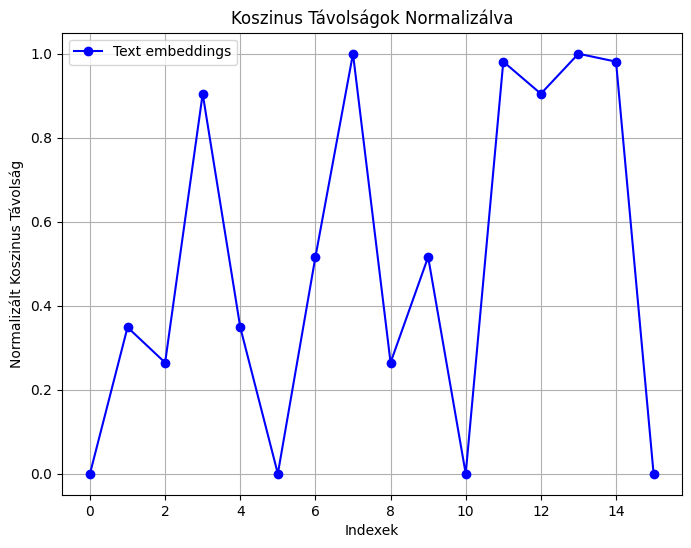

In [56]:
import torch
from transformers import AutoTokenizer, AutoModel
import numpy as np
import matplotlib.pyplot as plt

# HuBERT modell és tokenizáló betöltése
model_name = "SZTAKI-HLT/hubert-base-cc"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Szövegek, amelyeket be akarunk ágyazni
texts = ["Kutyák a parkban", "Kutyák játszanak", "Macskák a fűben", "Hűtőszekrény a konyhában",]

# Szövegek beágyazása
text_embeddings = []
for text in texts:
    # Tokenizálás és modellezés
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=False)
    with torch.no_grad():
        outputs = model(**inputs)
    # Az utolsó réteg kimenetét használjuk vektorokként
    vector = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    text_embeddings.append(vector)

# Koszinus távolság számítása
def cosine_distance(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    distance = 1 - similarity
    return distance

# Koszinus távolságok számítása és normalizálása
text_distances = []
text_pairs = []

for i, vec1 in enumerate(text_embeddings):
    for j, vec2 in enumerate(text_embeddings):
        distance = cosine_distance(vec1, vec2)
        text_distances.append(distance)
        text_pairs.append((texts[i], texts[j]))


# Normalizálás
text_normalized_distances = (text_distances - np.min(text_distances)) / (np.max(text_distances) - np.min(text_distances))


print("Párosított szövegek és normalizált koszinusz távolságok: ")
text_counter = 0
for pair, distance in zip(text_pairs, text_normalized_distances):
    print(text_counter, "->", pair, "-", distance)
    text_counter += 1

# Grafikon ábrázolása
plt.figure(figsize=(8, 6))
plt.plot(text_normalized_distances, marker='o', linestyle='-', color='b', label="Text embeddings")
plt.xlabel('Indexek')
plt.ylabel('Normalizált Koszinus Távolság')
plt.title('Koszinus Távolságok Normalizálva')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
image_paths = ["/content/kutya.jpg", "/content/kutyajatszik.jpg", "/content/macska.jpg", "/content/huto.jpg"]  # Az elérési utak a képekhez


/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Párosított képek és normalizált koszinusz távolságok: 
0 -> ('/content/kutya.jpg', '/content/kutya.jpg') - 0.0
1 -> ('/content/kutya.jpg', '/content/kutyajatszik.jpg') - 0.7610834443074775
2 -> ('/content/kutya.jpg', '/content/macska.jpg') - 0.8282229099201392
3 -> ('/content/kutya.jpg', '/content/huto.jpg') - 0.9976949980032993
4 -> ('/content/kutyajatszik.jpg', '/content/kutya.jpg') - 0.7610834443074775
5 -> ('/content/kutyajatszik.jpg', '/content/kutyajatszik.jpg') - 0.0
6 -> ('/content/kutyajatszik.jpg', '/content/macska.jpg') - 0.9932754349063495
7 -> ('/content/kutyajatszik.jpg', '/content/huto.jpg') - 0.9735137843289886
8 -> ('/content/macska.jpg', '/content/kutya.jpg') - 0.8282229099201392
9 -> ('/content/macska.jpg', '/content/kutyajatszik.jpg') - 0.9932754349063495
10 -> ('/content/macska.jpg', '/content/macska.jpg') - 1.2768414110058416e-07
11 -> ('/content/macska.jpg', '/content/huto.jpg') - 1.0
12 -> ('/content/huto.jpg', '/content/kutya.jpg') - 0.9976949980032993
13 -> ('

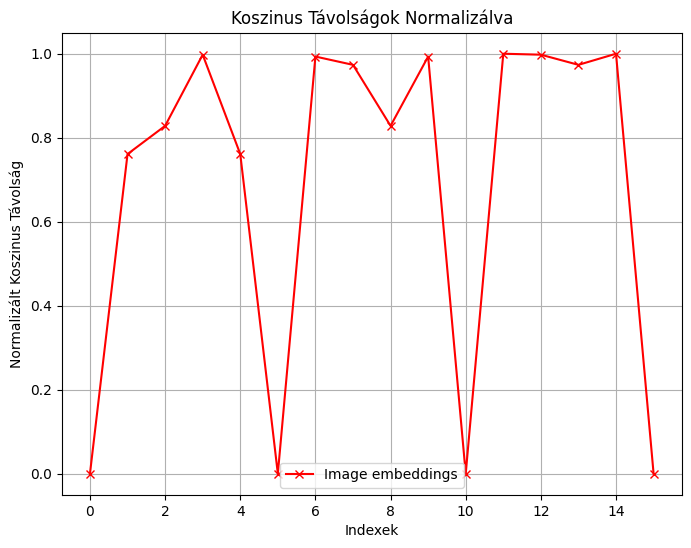

In [54]:
import torch
from transformers import ViTFeatureExtractor, ViTModel
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ViT modell és tokenizáló betöltése képekhez
image_feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
image_model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

image_embeddings = []
for path in image_paths:
    image = Image.open(path)
    inputs = image_feature_extractor(images=image, return_tensors="pt")
    with torch.no_grad():
        outputs = image_model(**inputs)
    # Az utolsó rejtett állapotokat használjuk vektorokként
    vector = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    image_embeddings.append(vector)

# Koszinus távolság számítása
def cosine_distance(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    similarity = dot_product / (norm_vector1 * norm_vector2)
    distance = 1 - similarity
    return distance

# Koszinus távolságok számítása és normalizálása
image_distances = []
image_pairs = []
for i, img_vec1 in enumerate(image_embeddings):
    for j, img_vec2 in enumerate(image_embeddings):
        distance = cosine_distance(img_vec1, img_vec2)
        image_distances.append(distance)
        image_pairs.append((image_paths[i], image_paths[j]))

# Normalizálás
image_normalized_distances = (image_distances - np.min(image_distances)) / (np.max(image_distances) - np.min(image_distances))

print("Párosított képek és normalizált koszinusz távolságok: ")
image_counter = 0
for pair, distance in zip(image_pairs, image_normalized_distances):
    print(image_counter, "->", pair, "-", distance)
    image_counter += 1

# Grafikon ábrázolása
plt.figure(figsize=(8, 6))
plt.plot(image_normalized_distances, marker='x', linestyle='-', color='r', label="Image embeddings")
plt.xlabel('Indexek')
plt.ylabel('Normalizált Koszinus Távolság')
plt.title('Koszinus Távolságok Normalizálva')
plt.legend()
plt.grid(True)
plt.show()


Párosított képek és normalizált koszinusz távolságok: 
0 -> ('/content/kutya.jpg', '/content/kutya.jpg') - 0.0
1 -> ('/content/kutya.jpg', '/content/kutyajatszik.jpg') - 0.7610834443074775
2 -> ('/content/kutya.jpg', '/content/macska.jpg') - 0.8282229099201392
3 -> ('/content/kutya.jpg', '/content/huto.jpg') - 0.9976949980032993
4 -> ('/content/kutyajatszik.jpg', '/content/kutya.jpg') - 0.7610834443074775
5 -> ('/content/kutyajatszik.jpg', '/content/kutyajatszik.jpg') - 0.0
6 -> ('/content/kutyajatszik.jpg', '/content/macska.jpg') - 0.9932754349063495
7 -> ('/content/kutyajatszik.jpg', '/content/huto.jpg') - 0.9735137843289886
8 -> ('/content/macska.jpg', '/content/kutya.jpg') - 0.8282229099201392
9 -> ('/content/macska.jpg', '/content/kutyajatszik.jpg') - 0.9932754349063495
10 -> ('/content/macska.jpg', '/content/macska.jpg') - 1.2768414110058416e-07
11 -> ('/content/macska.jpg', '/content/huto.jpg') - 1.0
12 -> ('/content/huto.jpg', '/content/kutya.jpg') - 0.9976949980032993
13 -> ('

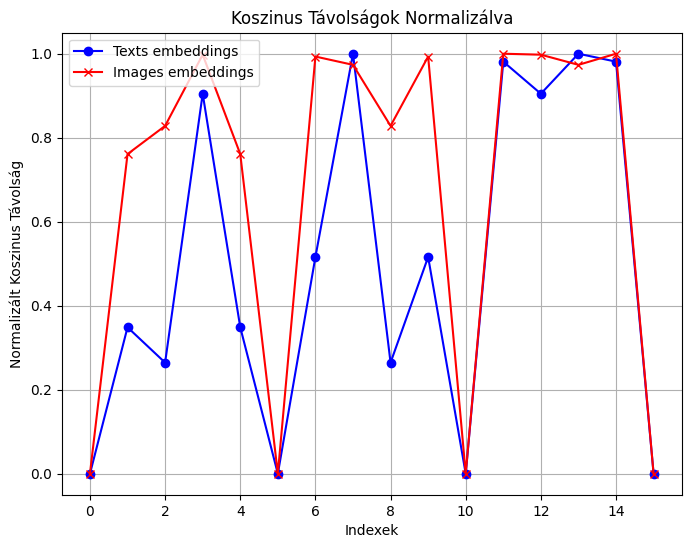

In [58]:
print("Párosított képek és normalizált koszinusz távolságok: ")
image_counter = 0
for pair, distance in zip(image_pairs, image_normalized_distances):
    print(image_counter, "->", pair, "-", distance)
    image_counter += 1

print("Párosított szövegek és normalizált koszinusz távolságok: ")
text_counter = 0
for pair, distance in zip(text_pairs, text_normalized_distances):
    print(text_counter, "->", pair, "-", distance)
    text_counter += 1

plt.figure(figsize=(8, 6))
plt.plot(text_normalized_distances, marker='o', linestyle='-', color='b', label="Texts embeddings")
plt.plot(image_normalized_distances, marker='x', linestyle='-', color='r', label="Images embeddings")
plt.xlabel('Indexek')
plt.ylabel('Normalizált Koszinus Távolság')
plt.title('Koszinus Távolságok Normalizálva')
plt.legend()
plt.grid(True)
plt.show()